# Principal Component Analysis (PCA)

**Overview**

The code is an implementation of a K-Nearest Neighbours model to predict the housing prices using the [**kc_house dataset**](https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Regression/kc_house_data.csv).<br><br> K-Nearest Neighbours regression is a statistical approach used to model the relationship between a dependent variable (target) and one or more independent variables (features). In this case, the **target variable** is the **housing price**, while the **features** are the number of **bedrooms, bathrooms, living area, lot area, floors, waterfront, view, condition, and grade** of the property.

The code uses the popular scikit-learn library for machine learning in Python to preprocess the data, split it into train and test sets, train the , and evaluate its performance. The evaluation metrics used in the code include R-squared value, mean squared error, mean absolute error, and root mean squared error.

The code also includes functions to plot the actual vs predicted values, residuals, and the distribution of the residuals. The residuals are the differences between the actual and predicted values, and their distribution can reveal insights into the performance of the model.

In [47]:
# Import the required libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required libraries for machine learning
import math
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import learning_curve

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


In [2]:
# Set the dataset URL
url = "https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Regression/kc_house_data.csv"

In [3]:
def load_data(url):
    """
    Loads data from a given url into a pandas dataframe.
    """
    df = pd.read_csv(url)
    return df

In [54]:
def clean_data(df):
    """
    Cleans the given dataframe by removing rows with incorrect data
    and dropping unnecessary columns.
    """
    # Remove rows with incorrect data
    df = df.drop(df[(df['bedrooms'] == 33) & (df['bathrooms'] == 1.75)].index)
    df = df.drop(df[(df['bedrooms'] == 0) & (df['price'] == 1095000)].index)
    df = df.drop(df[(df['bedrooms'] == 0) & (df['price'] == 380000)].index)
    df = df.drop(df[(df['bedrooms'] == 33) & (df['sqft_living'] == 1620)].index)
    df = df.drop(df[(df['sqft_lot'] == 1600000) & (df['bathrooms'] == 1) & (df['sqft_living'] == 1600)].index)

    # Drop the "id" and "date" columns
    df = df.drop(['id', 'date', 'zipcode'], axis=1)

    # Drop 1% of data to make price column normally distrubted
    df = df.sort_values(['price'], ascending=False).iloc[200:]


    return df

In [55]:
from os import X_OK
def split_data(df, test_size=0.2, random_state=42):
    """
    Splits the given dataframe into train and test sets.
    """
    # Scale the data using standard scaler
    X = df.iloc[:,1:]
    y = df.iloc[:,0:1]
    #X = x.values
    #Y = y.values
    
    #scaling the data

    sc1=StandardScaler()
    x_scaled = sc1.fit_transform(X)


    return x_scaled, y

In [56]:
# Load the dataset
df = load_data(url)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [58]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
# Clean the data
df = clean_data(df)

In [60]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
15039,2000000.0,3,3.25,2610,16387,2.0,1,4,3,9,2610,0,2006,0,47.7175,-122.278,2590,12958
10468,2000000.0,4,3.75,2870,4500,2.0,0,3,3,10,2510,360,2012,0,47.6291,-122.363,2870,6354
21,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,47.5316,-122.233,4110,20336
13271,2000000.0,4,3.00,4260,18000,2.0,0,2,3,11,4260,0,2000,0,47.5355,-122.240,3540,17015
4486,2000000.0,5,4.00,4580,4443,3.0,1,4,3,10,4580,0,2004,0,47.5682,-122.059,2710,4443


In [61]:
def perform_pca(data, n_components):
    """
    Performs PCA on the given data and returns the transformed data.
    
    Parameters:
    data (DataFrame): The input data to perform PCA on.
    n_components (int): The number of principal components to keep.
    
    Returns:
    pca_data (DataFrame): The transformed data after PCA.
    pca (PCA): The PCA object used for transformation.
    """
    # Instantiate PCA object with n_components
    pca = PCA(n_components=n_components)

    # Fit and transform data
    pca_data = pca.fit_transform(data)

    # Create column names for PCA components
    pca_columns = ['PC' + str(i) for i in range(1, n_components+1)]

    # Create DataFrame for PCA components
    pca_data = pd.DataFrame(data=pca_data, columns=pca_columns)

    return pca_data, pca

In [62]:
# Split the data into train and test sets
X, y = split_data(df)

In [63]:
X_pca, pca = perform_pca(X, 3)

In [64]:
X_pca

,PC1,PC2,PC3
0,3.154962,3.660574,0.193829
1,3.804677,1.403101,-1.301256
2,3.019397,2.946293,0.988961
3,5.585837,0.533754,-0.525534
4,7.056088,3.467629,-0.443374
...,...,...,...
21405,-3.213422,-0.598311,0.255781
21406,-3.877318,-1.820508,0.137882
21407,-4.629167,-1.805649,0.982379
21408,-3.321060,-1.753239,0.372883


In [65]:
pca.explained_variance_ratio_

array([0.29937987, 0.1179475 , 0.10621   ])

In [70]:
sum(pca.explained_variance_ratio_)

0.5235373680516563

,PC1,PC2,PC3,price
count,21410.000000,21410.000000,21410.000000,2.141000e+04
mean,0.000000,0.000000,0.000000,5.192564e+05
std,2.256035,1.416051,1.343746,2.874626e+05
min,-5.444624,-3.541152,-2.373525,7.500000e+04
25%,-1.649436,-1.052538,-0.551375,3.200000e+05
50%,-0.269390,-0.245070,-0.158585,4.500000e+05
75%,1.376988,0.792442,0.248179,6.350000e+05
max,13.794941,8.057582,36.201363,2.000000e+06


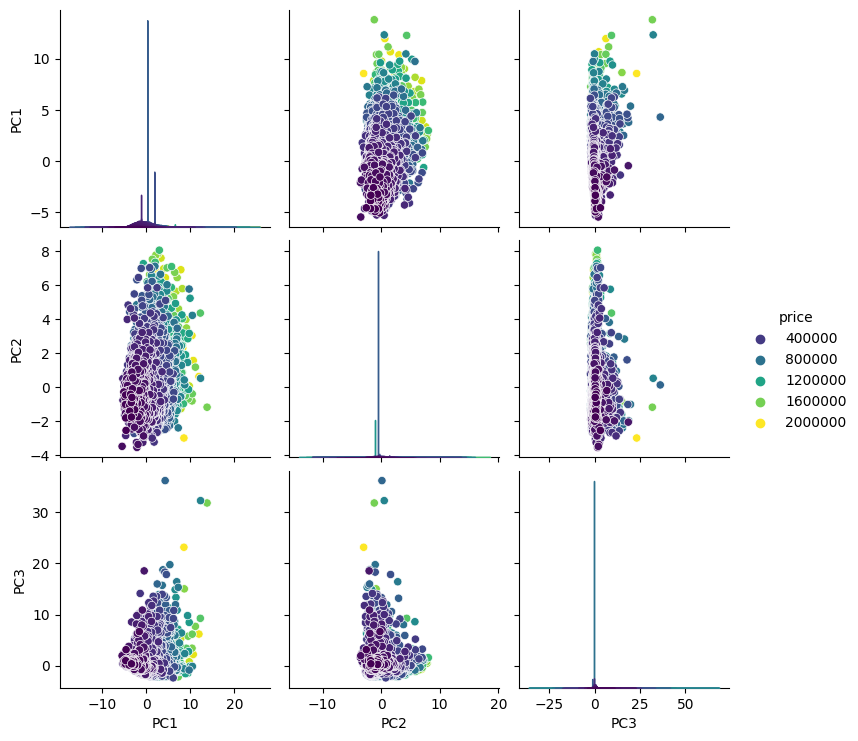

In [67]:
# Create a new dataframe with the principal components and target variable
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['price'] = y.values

# Plot pair plot
sns.pairplot(df_pca, vars=['PC1', 'PC2', 'PC3'], hue='price', palette='viridis')
plt.show()

In [68]:
sc2=StandardScaler()
y_scaled = np.ravel(sc2.fit_transform(y.values.reshape(-1,1)))
y_scaled

array([ 5.1512032 ,  5.1512032 ,  5.1512032 , ..., -1.52808286,
       -1.53504045, -1.54547683])

In [77]:
df_pca.describe()

,PC1,PC2,PC3,price
count,21410.000000,21410.000000,21410.000000,2.141000e+04
mean,0.000000,0.000000,0.000000,-4.247990e-17
std,2.256035,1.416051,1.343746,1.000023e+00
min,-5.444624,-3.541152,-2.373525,-1.545477e+00
25%,-1.649436,-1.052538,-0.551375,-6.931721e-01
50%,-0.269390,-0.245070,-0.158585,-2.409288e-01
75%,1.376988,0.792442,0.248179,4.026483e-01
max,13.794941,8.057582,36.201363,5.151203e+00


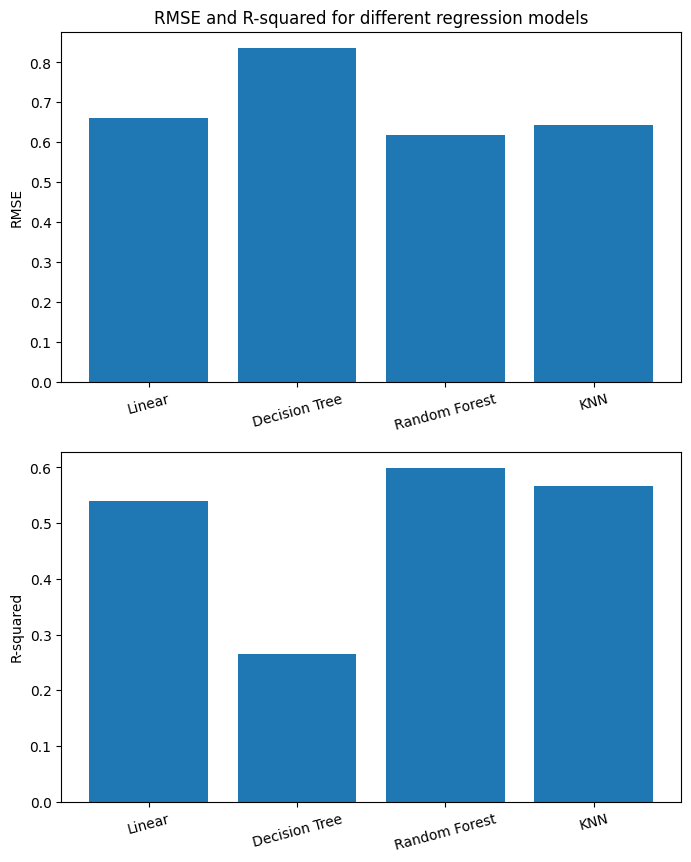

In [69]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_scaled, test_size=0.2, random_state=42)

# Train different regression models
models = [    LinearRegression(),    DecisionTreeRegressor(),    RandomForestRegressor(),    KNeighborsRegressor(),]

# Compute the RMSE and R-squared for each model
rmse_scores = []
r2_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Plot the RMSE and R-squared for each model
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
ax[0].bar(range(len(models)), rmse_scores)
ax[0].set_xticks(range(len(models)))
ax[0].set_xticklabels(['Linear', 'Decision Tree', 'Random Forest', 'KNN'], rotation=15)
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE and R-squared for different regression models')
ax[1].bar(range(len(models)), r2_scores)
ax[1].set_xticks(range(len(models)))
ax[1].set_xticklabels(['Linear', 'Decision Tree', 'Random Forest', 'KNN'], rotation=15)
ax[1].set_ylabel('R-squared')
plt.show()
